In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

[[ 26  51  11  16 142]
 [241 113 151 149  76]
 [224 100 118  75 237]
 [157  73 137 119 228]
 [237  32 138  32 199]]


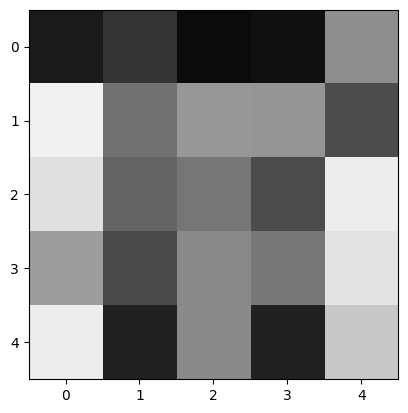

In [16]:
# create a grayscale image out of a matrix
img_matrix = np.random.randint(0, 255, (5, 5), dtype=np.uint8)
print(img_matrix)
img = Image.fromarray(img_matrix, 'L')

# show with matplotlib
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

## Thresholding

[[214 207 209 ... 206 204 242]
 [191 185 188 ... 188 187 239]
 [187 184 188 ... 190 189 237]
 ...
 [187 187 188 ... 190 188 237]
 [200 201 201 ... 207 206 244]
 [246 246 246 ... 250 250 254]]


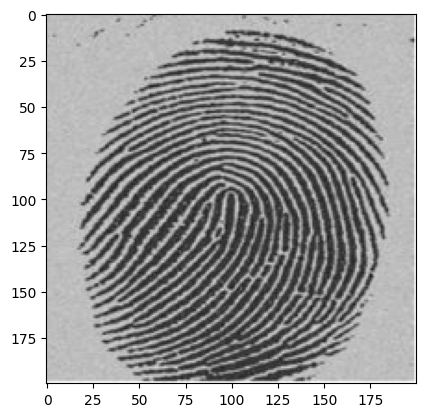

In [53]:
# load an image into a matrix
path = "../Images/fingerprint.jpg"
img = cv2.imread(path, 0)

# resize the image to 200x200
img = cv2.resize(img, (200, 200))
print(img)

# display the image
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

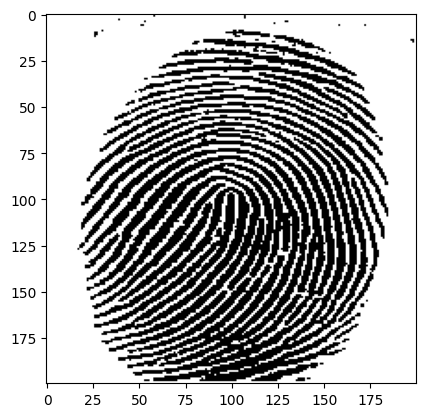

In [54]:
# threshold the image
# if the pixel value is greater than the threshold value, it is assigned one value (may be white), else it is assigned another value (may be black).
def threshold(img, thresh):
    # change the value of the matrix to 255 where the matrix value is greater than thresh
    thresh_img = (img > thresh) * 255
    return thresh_img

# change thresh value to see the effect
thresh = 127
thresh_img = threshold(img, thresh)

# display the image
plt.imshow(thresh_img, cmap='gray', vmin=0, vmax=255)
plt.show()

# De-noising

[[250 202 235 ... 230 244 251]
 [253 220 206 ... 236 243 242]
 [247 240 208 ... 243 240 253]
 ...
 [239 207 182 ... 134 184 247]
 [248 234 231 ... 124 181 254]
 [251 226 206 ... 162 202 252]]


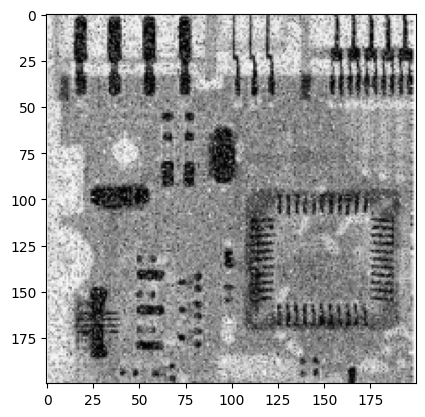

In [55]:
# load an image into a matrix
path = "../Images/noisy_image.jpg"
img = cv2.imread(path, 0)

# resize the image to 200x200
img = cv2.resize(img, (200, 200))
print(img)

# display the image
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

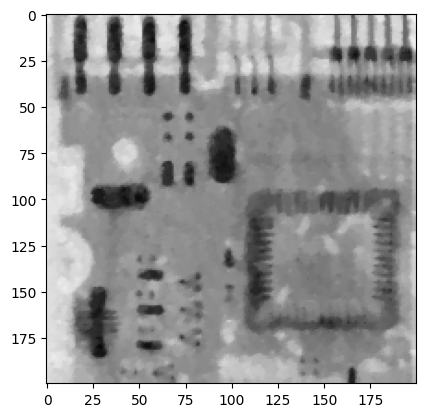

In [58]:
# Replace each pixel’s value by the median of its neighbors
def denoise(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            neighbors = []
            dx = [-1, 0, 1]
            dy = [-1, 0, 1]
            for x in dx:
                for y in dy:
                    if x == 0 and y == 0:
                        continue
                    elif i+x >= 0 and i+x < img.shape[0] and j+y >= 0 and j+y < img.shape[1]:
                        neighbors.append(img[i+x][j+y])
            median = np.median(neighbors)
            img[i][j] = median
    return img

denoised_img = denoise(img)

# display the image
plt.imshow(denoised_img, cmap='gray', vmin=0, vmax=255)
plt.show()